# Setup

In [ ]:
import pandas as pd
from IPython.display import clear_output
import textwrap

# Load Event Files

In [ ]:
url_events = "https://drive.google.com/uc?id=16PEr-QdvD4v44MzkgAEMsoA87LW-2F_N&export=download"
events = pd.read_csv(url_events, sep=',', decimal='.', header=0)
events = events.rename(columns={'id': 'event_id', 'user_id': 'colab_user_id', 'lng': 'lon', 'score':'_score','compound_score': 'score'})

# Select the columns of interest
selected_columns = ['event_id', 'colab_user_id', 'description', 'score']
events = events[selected_columns]
events

,event_id,colab_user_id,description,score
0,264150,333698,"Lâmpada apaga poste em frente ao número 116, n...",0.095
1,239202,240336,entulho na calçada atrapalhando a passagem do ...,0.040
2,193842,185994,Terreno abandonado servindo de moradia para de...,-0.801
3,117236,197404,Bom Dia!! A saída da Avenida Itamaraty para ac...,0.566
4,374904,329091,Excelentíssimo Senhor Prefeito de Santo André ...,-0.496
...,...,...,...,...
3995,242571,240336,Entulho na calçada atrapalhando a passagem do ...,0.095
3996,292113,76184,Este é o Grande Trabalho Feito Pela Clin Na Es...,0.167
3997,325002,209132,Boa tarde. meus amigos a travessa Edson passo...,0.604
3998,200548,260987,foi feito um baixa assinado sobre o som alto e...,-0.202


# Classification Prompt

In [ ]:
class ClassificationPrompt:
    def __init__(self, df):
        self.df = df
        self.total_rows = len(df)

    def classify_descriptions(self):
        # Add a new column for persona
        self.df['persona'] = ""

        # Iterate over the DataFrame rows using enumerate
        for count, (index, row) in enumerate(self.df.iterrows()):
            # Print the description and progress
            print(f"Progress: {count + 1} out of {self.total_rows} ({((count + 1) / self.total_rows) * 100:.2f}%)")
            print(f"Description: {textwrap.fill(row['description'], width=100)}")

            # Prompt the user for input
            while True:
                persona = input("Classify:\n1:helper\n2:complainer\n").strip()
                if persona in ['1', '2']:
                    break
                else:
                    print("Invalid input. Please enter 1 for helper or 2 for complainer.")

            # Store the input in the persona column
            self.df.at[index, 'persona'] = persona

            # Clear the output to keep the notebook clean
            from IPython.display import clear_output
            clear_output(wait=True)

        print("Classification completed!")
        return self.df

In [ ]:
# Create an instance of the ClassificationPrompt class
#sampled_events = events.sample(n=10, random_state=1)
classifier = ClassificationPrompt(events)

In [ ]:
# Start the classification process
classified_df = classifier.classify_descriptions()

Classification completed!
   event_id  colab_user_id                                        description  \
0    264150         333698  Lâmpada apaga poste em frente ao número 116, n...   
1    239202         240336  entulho na calçada atrapalhando a passagem do ...   
2    193842         185994  Terreno abandonado servindo de moradia para de...   
3    117236         197404  Bom Dia!! A saída da Avenida Itamaraty para ac...   
4    374904         329091  Excelentíssimo Senhor Prefeito de Santo André ...   

   score persona  
0  0.095       1  
1  0.040       1  
2 -0.801       1  
3  0.566       1  
4 -0.496       1  


# Filtering/normalization

In [ ]:
classified_df

,event_id,colab_user_id,description,score,persona
0,264150,333698,"Lâmpada apaga poste em frente ao número 116, n...",0.095,1
1,239202,240336,entulho na calçada atrapalhando a passagem do ...,0.040,1
2,193842,185994,Terreno abandonado servindo de moradia para de...,-0.801,1
3,117236,197404,Bom Dia!! A saída da Avenida Itamaraty para ac...,0.566,1
4,374904,329091,Excelentíssimo Senhor Prefeito de Santo André ...,-0.496,1
...,...,...,...,...,...
3995,242571,240336,Entulho na calçada atrapalhando a passagem do ...,0.095,1
3996,292113,76184,Este é o Grande Trabalho Feito Pela Clin Na Es...,0.167,2
3997,325002,209132,Boa tarde. meus amigos a travessa Edson passo...,0.604,1
3998,200548,260987,foi feito um baixa assinado sobre o som alto e...,-0.202,1


In [ ]:
results = classified_df.copy()

In [ ]:
# Rename the 'persona' column to 'label'
results = results.rename(columns={'persona': 'label'})

# Replace the values in the 'label' column
label_mapping = {
    '1': 'helper',
    '2': 'complainer'
}
results['label'] = results['label'].replace(label_mapping)
results

,event_id,colab_user_id,description,score,label
0,264150,333698,"Lâmpada apaga poste em frente ao número 116, n...",0.095,helper
1,239202,240336,entulho na calçada atrapalhando a passagem do ...,0.040,helper
2,193842,185994,Terreno abandonado servindo de moradia para de...,-0.801,helper
3,117236,197404,Bom Dia!! A saída da Avenida Itamaraty para ac...,0.566,helper
4,374904,329091,Excelentíssimo Senhor Prefeito de Santo André ...,-0.496,helper
...,...,...,...,...,...
3995,242571,240336,Entulho na calçada atrapalhando a passagem do ...,0.095,helper
3996,292113,76184,Este é o Grande Trabalho Feito Pela Clin Na Es...,0.167,complainer
3997,325002,209132,Boa tarde. meus amigos a travessa Edson passo...,0.604,helper
3998,200548,260987,foi feito um baixa assinado sobre o som alto e...,-0.202,helper


In [ ]:
import pandas as pd
import re

# Assuming results is your DataFrame

# Define the list of words/phrases that indicate a complainer
complainer_words = [
    'descaso', 'iptu', 'impostos', 'imposto', 'ipva', 'vota', 'votar', 'noia', 'nóia', 'crackolândia', 'crackolandia', 'lavar as mãos', 'degeneração', 'vagabundo', 'corruptos', 'ridículo', 'karaokê', 'esperem alguém morrer',
    'fraude', 'obra mal feita', 'façam alguma coisa', 'façam o seu trabalho', 'de quem é a responsabilidade',
    'corrupto', 'prevaricação','corrupção', 'vergonha', 'pt', 'vergonhoso', 'favelização', 'vagabundos', 'palhaço', 'palhaçada', 'burro', 'imbecil', 'incompetente', 'safado', 'sacanagem', 'rodrigo neves', 'a mercer', 'fraudada',
    'eleição', 'eleições', 'lamentável', 'lamentavel', 'voto', 'eleito', 'mandato', 'mandatos', 'votos', 'merece respeito', 'paulo serra', 'abel', 'contribuinte', 'contribuintes', 'psdb', 'pdt', 'psb', 'lucro', 'lucram', 'estão esperando alguém',
]

# Compile a regular expression pattern for the complainer words/phrases
pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in complainer_words) + r')\b', re.IGNORECASE)

# Iterate over the rows of the DataFrame
for index, row in results.iterrows():
    # Check if any of the complainer words/phrases are present in the description using regex search
    if pattern.search(row['description']):
        # Update the label to 'complainer'
        results.at[index, 'label'] = 'complainer'

# Distibution of categories

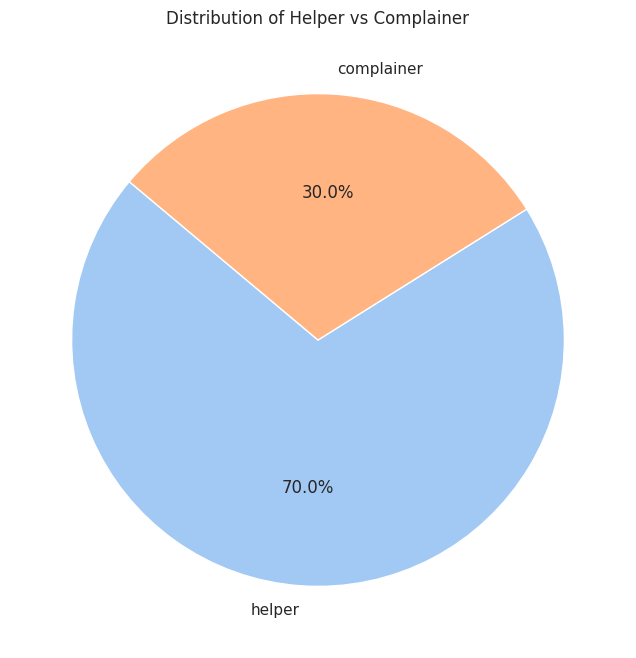

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Get the count of each label
label_counts = results['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Helper vs Complainer')
plt.show()


In [ ]:
# Get the distribution of classes
class_distribution = results['label'].value_counts()
print(class_distribution)


helper        2801
complainer    1199
Name: label, dtype: int64


In [ ]:
# Calculate the length of each post
results['text_length'] = results['description'].apply(len)

# Get summary statistics for text length by class
print(results.groupby('label')['text_length'].describe())


             count        mean         std   min    25%    50%    75%     max
label                                                                        
complainer  1199.0  451.613845  389.022340  81.0  212.0  340.0  558.5  3704.0
helper      2801.0  224.814352  219.085927  80.0  110.0  167.0  269.0  7145.0


In [ ]:
# Analyze sentiment scores by class
print(results.groupby('label')['score'].mean())


label
complainer   -0.528198
helper       -0.133474
Name: score, dtype: float64


In [ ]:
results

,event_id,colab_user_id,description,score,label
0,264150,333698,"Lâmpada apaga poste em frente ao número 116, n...",0.095,helper
1,239202,240336,entulho na calçada atrapalhando a passagem do ...,0.040,helper
2,193842,185994,Terreno abandonado servindo de moradia para de...,-0.801,helper
3,117236,197404,Bom Dia!! A saída da Avenida Itamaraty para ac...,0.566,helper
4,374904,329091,Excelentíssimo Senhor Prefeito de Santo André ...,-0.496,complainer
...,...,...,...,...,...
3995,242571,240336,Entulho na calçada atrapalhando a passagem do ...,0.095,helper
3996,292113,76184,Este é o Grande Trabalho Feito Pela Clin Na Es...,0.167,complainer
3997,325002,209132,Boa tarde. meus amigos a travessa Edson passo...,0.604,helper
3998,200548,260987,foi feito um baixa assinado sobre o som alto e...,-0.202,helper


# Balancing categoies

In [ ]:
# Get the number of 'complainer' rows
num_complainers = len(results[results['label'] == 'complainer'])

# Filter the DataFrame for 'helper' and 'complainer'
helper_df = results[results['label'] == 'helper']
complainer_df = results[results['label'] == 'complainer']

# Calculate the absolute value of the score column for sorting
helper_df['abs_score'] = helper_df['score'].abs()

# Filter out rows with scores close to 0 by keeping rows with absolute score above a threshold (e.g., 0.1)
helper_df = helper_df[helper_df['abs_score'] > 0.1]

# Sort the helper DataFrame by the absolute score in descending order and sample rows
selected_helper_df = helper_df.sort_values(by='abs_score', ascending=False).sample(n=num_complainers, random_state=1)

# Concatenate the sampled 'helper' rows with the 'complainer' rows to create a balanced DataFrame
filtered_result = pd.concat([selected_helper_df, complainer_df]).drop(columns='abs_score').reset_index(drop=True)

# Display the first few rows of the balanced DataFrame
print(filtered_result.head())

# Check the distribution of the 'label' column in the balanced DataFrame
print(filtered_result['label'].value_counts())

   event_id  colab_user_id                                        description  \
0    293875          43341  Av. Anita Nilo Peçanha, 235     Fiação pendura...   
1     67467         131127  Linha 61,Onibus n 1.3.009 esta com forro do ba...   
2    310161         219870  BOA NOITE!  APEDIDO DOS MORADORES QUE MORAM NA...   
3    295061         334155  os moradores da Travessa capitão jesus entre o...   
4    234513         221969  Solicitamos poda de árvore com urgência. Galho...   

   score   label  text_length  
0 -0.200  helper          215  
1 -0.801  helper          115  
2 -0.794  helper          650  
3  0.242  helper          125  
4 -0.185  helper          121  
helper        1199
complainer    1199
Name: label, dtype: int64


<ipython-input-143-b3d91c29af72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helper_df['abs_score'] = helper_df['score'].abs()


In [ ]:
filtered_result

,event_id,colab_user_id,description,score,label,text_length
0,293875,43341,"Av. Anita Nilo Peçanha, 235 Fiação pendura...",-0.200,helper,215
1,67467,131127,"Linha 61,Onibus n 1.3.009 esta com forro do ba...",-0.801,helper,115
2,310161,219870,BOA NOITE! APEDIDO DOS MORADORES QUE MORAM NA...,-0.794,helper,650
3,295061,334155,os moradores da Travessa capitão jesus entre o...,0.242,helper,125
4,234513,221969,Solicitamos poda de árvore com urgência. Galho...,-0.185,helper,121
...,...,...,...,...,...,...
2393,216627,188814,Essa bomba foi instalada na Rua Silveira da Mo...,-0.918,complainer,291
2394,341714,356356,"Infelizmente estamos largados , toda a Martins...",-0.871,complainer,351
2395,252955,258263,Praça localizada ao Lado da Unidade de Saúde M...,-0.850,complainer,161
2396,326018,380555,Terreno totalmente abandonado! O muro já caiu ...,-0.902,complainer,333


# Download Results

In [ ]:
filtered_result.to_csv("colab_persona_training.csv")